In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')


# Set path to root directory /content/drive/MyDrive/fastCloud
path = Path('/content/drive/MyDrive/fastCloud')
# View all files in directory
path.ls()

[PosixPath('/content/drive/MyDrive/fastCloud/val'),
 PosixPath('/content/drive/MyDrive/fastCloud/test'),
 PosixPath('/content/drive/MyDrive/fastCloud/train'),
 PosixPath('/content/drive/MyDrive/fastCloud/models')]

In [ ]:
# We are creating a fastai DataBunch from our dataset
# Preprocessing takes place when creating the databunch
# May need to decrease batch size and num_workers depending on GPU
data = ImageDataBunch.from_folder(path, train='train', valid='test', ds_tfms=get_transforms(do_flip=False), size=224, bs=32, num_workers=8)


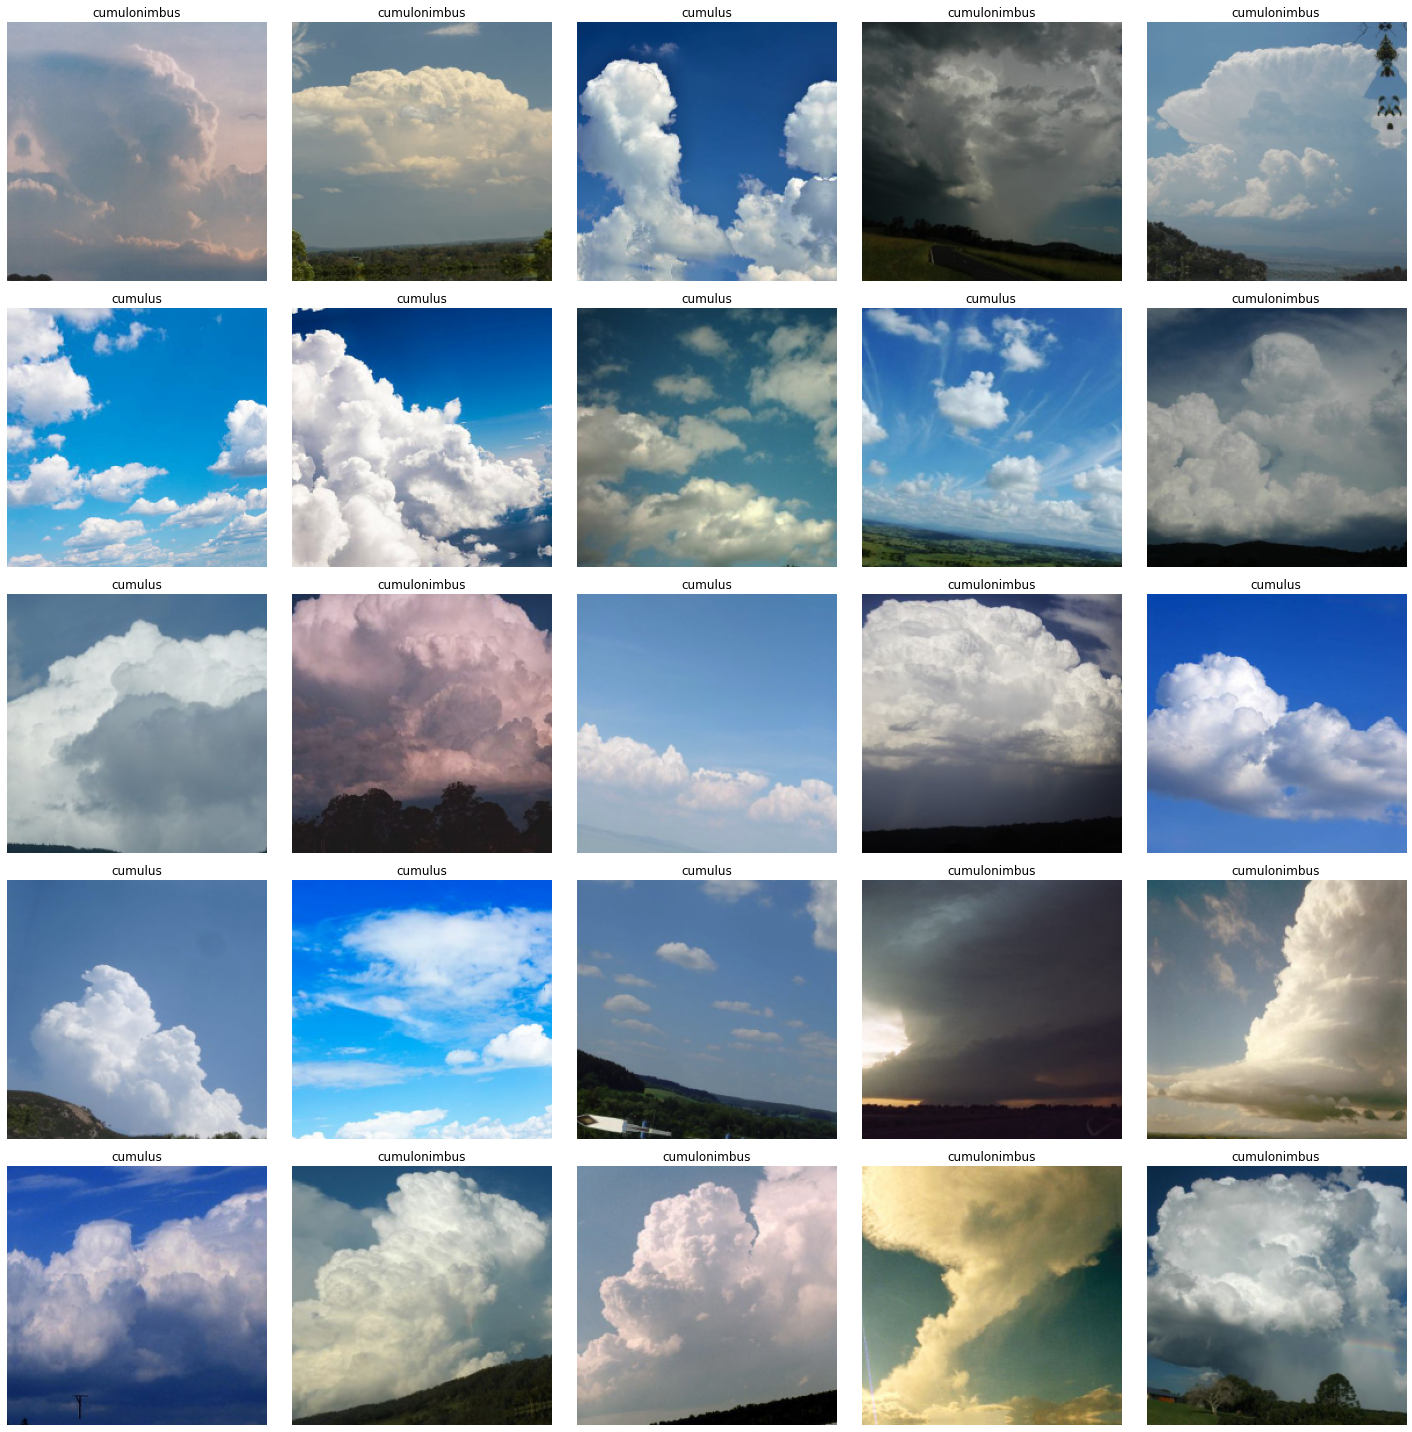

In [3]:
# Show what the data looks like after being transformed
data.show_batch()
# See the classes and count of classes in your dataset





In [4]:
print(data.classes,data.c)


['cumulonimbus', 'cumulus'] 2


In [5]:
# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

40 40


In [20]:
learn = cnn_learner(data, models.resnet34, metrics = [accuracy])

In [7]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [21]:
learn.fit_one_cycle(3)

In [22]:
# Save the model
learn.save('stage-1')
# Load the Model
#learn.load('stage-1')

In [23]:
learn.unfreeze()
learn.fit_one_cycle(7)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


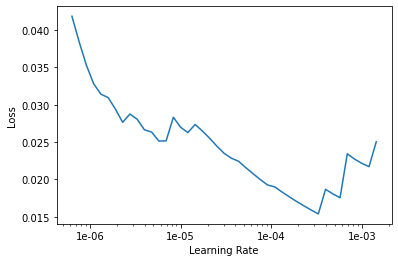

In [24]:
learn.lr_find()
learn.recorder.plot()

In [25]:

learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-3))

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

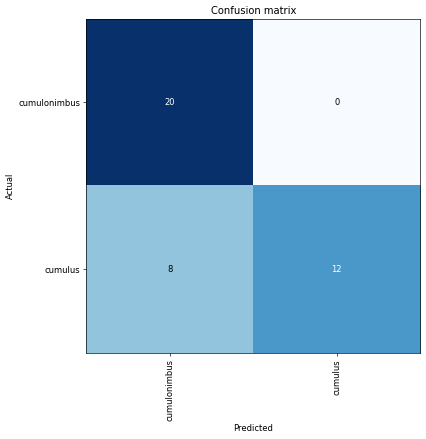

In [34]:
interp.plot_confusion_matrix(figsize=(7,8), dpi=60)

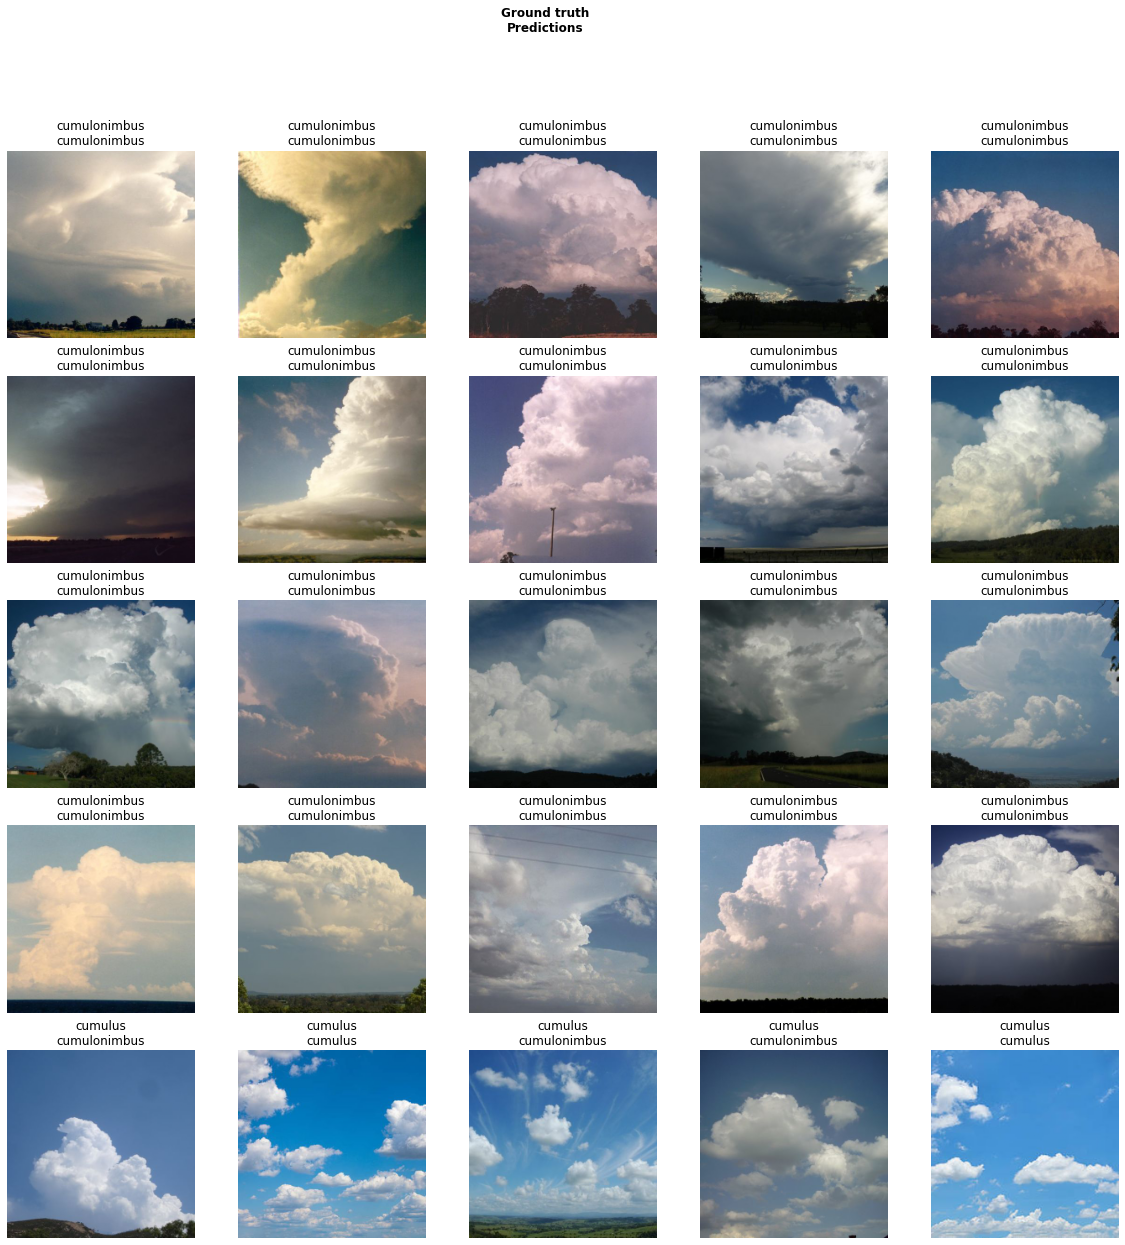

In [36]:
learn.show_results(8)

In [ ]:

learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 8.32E-05


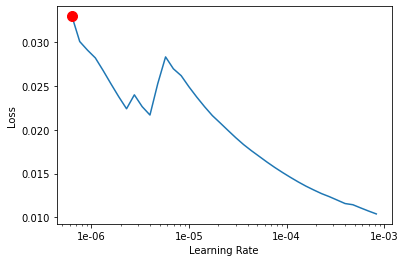

In [ ]:
# Save the model
learn.save('stage-1')
# Load the Model
learn.load('stage-1')

# Unfreeze all layers of the CNN
learn.unfreeze()
# Find the optimal learning rate and plot a visual
learn.lr_find()
learn.recorder.plot(suggestion=True)

# Fit the model over 2 epochs
learn.fit_one_cycle(4, max_lr=slice(3e-7, 3e-6))

# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

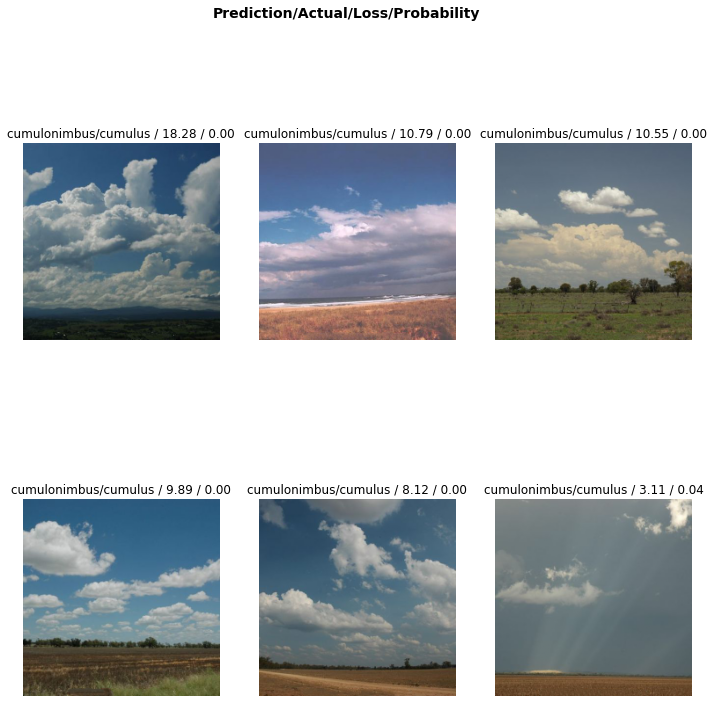

In [28]:
interp.plot_top_losses(6)